In [179]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks')
%matplotlib inline

In [180]:
def get_text(src):
    with io.open(src, 'r', encoding='utf-8', errors='ignore') as temp:
        return temp.read().replace("\n", " ")

df = pd.DataFrame({
    'text': [
        get_text('../assets/nld.txt'),
        #get_text('../assets/eng.txt'),
        #get_text('../assets/fra.txt'),
        #get_text('../assets/ger.txt'),
        #get_text('../assets/ita.txt'),
        #get_text('../assets/cat.txt'),
    ]
})

In [181]:
# characters, words, lines
df['characters'] = df.text.str.len()
df['words'] = df.text.str.split().str.len()
df['unique_words'] = df.text.apply(lambda x: len(set(x.split())))
df['lexical_density'] = df['unique_words'] / df['words']
df

,text,characters,words,unique_words,lexical_density
0,Het Gouden Ei Gelijkmatig als ruimteschepen be...,125346,22006,5602,0.254567


<Axes: >

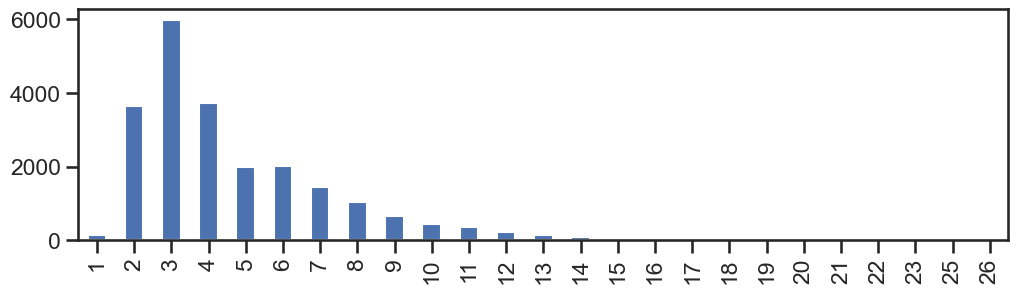

In [182]:
# Word length count
pd.Series(len(x) for x in ' '.join(df.text).split()).value_counts().sort_index().plot(kind='bar', figsize=(12, 3))

<Axes: >

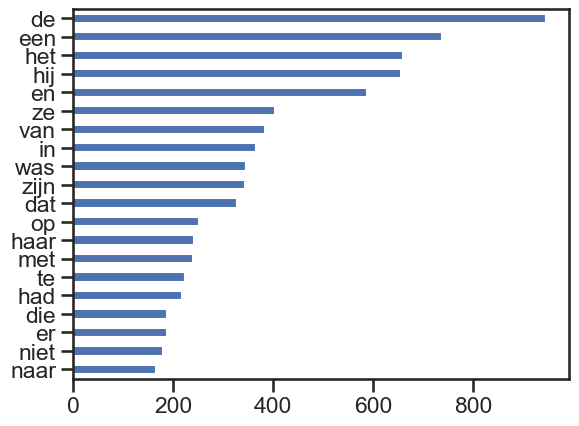

In [183]:
# Most common words
pd.Series(' '.join(df.text).lower().split()).value_counts()[:20][::-1].plot(kind='barh')

<Axes: >

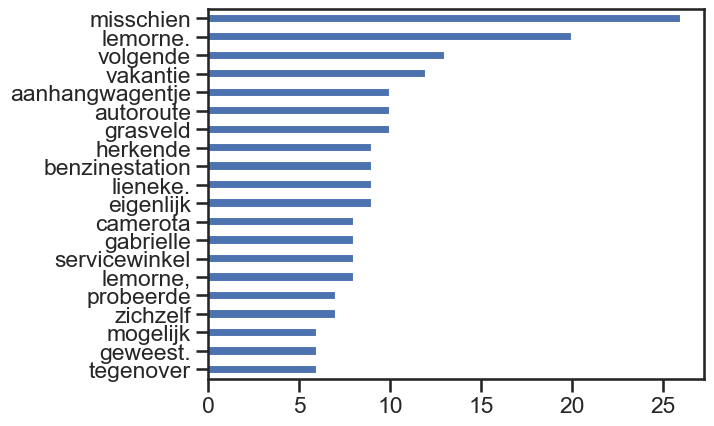

In [184]:
# Most common longer words
pd.Series([w for w in ' '.join(df.text).lower().split() if len(w) > 7]).value_counts()[:20][::-1].plot(kind='barh')

In [185]:
from nltk import ngrams

def get_ngrams_from_series(series, n=2):
    # using nltk.ngrams
    lines = ' '.join(series).lower().split('\n')
    lgrams = [ngrams(l.split(), n) for l in lines]
    grams = [[' '.join(g) for g in list(lg)] for lg in lgrams]
    return [item for sublist in grams for item in sublist]

<Axes: >

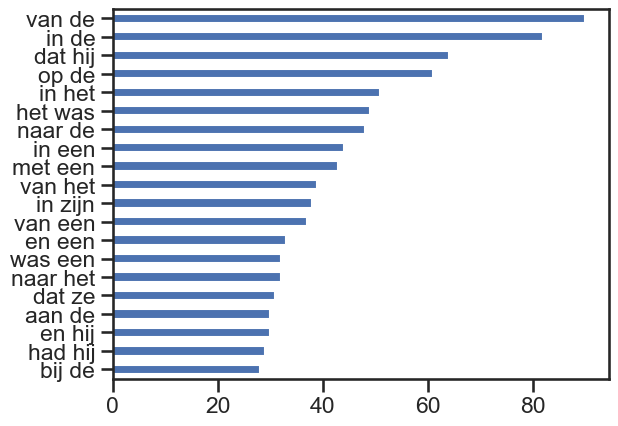

In [186]:
# Top bi-grams
pd.Series(get_ngrams_from_series(df.text, 2)).value_counts()[:20][::-1].plot(kind='barh')

<Axes: >

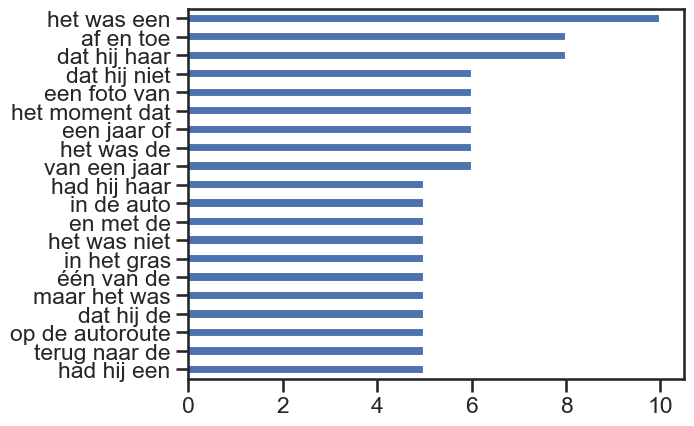

In [187]:
# Top tri-grams
pd.Series(get_ngrams_from_series(df.text, 3)).value_counts()[:20][::-1].plot(kind='barh')